In [1]:
import gcsfs 
import pandas as pd
import xarray as xr
import numpy as np
from PIL import Image

In [2]:
fs = gcsfs.GCSFileSystem()

In [3]:
fs.ls('gs://leap-persistent/ckg-2dxsu/Taylor_data/')

['leap-persistent/ckg-2dxsu/Taylor_data/GOBMs',
 'leap-persistent/ckg-2dxsu/Taylor_data/Taylor_inputs',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases']

In [4]:
fs.ls('gs://leap-persistent/ckg-2dxsu/Taylor_data/databases/raw')

['leap-persistent/ckg-2dxsu/Taylor_data/databases/raw/GLODAPv2.2023_Merged_Master_File.csv.zip',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases/raw/HOT_surface_CO2.txt',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases/raw/LDEO_Database_V2019.csv',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases/raw/bats_bottle.txt']

In [5]:
fs.ls('gs://leap-persistent/ckg-2dxsu/Taylor_data/databases/processed')

['leap-persistent/ckg-2dxsu/Taylor_data/databases/processed/GLODAPv2_spco2_2023.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases/processed/HOT_spco2_202312.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases/processed/LDEOv2019_spco2.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/databases/processed/bats_spco2_1988-10-2023-06.zarr']

In [4]:
fs.ls('gs://leap-persistent/ckg-2dxsu/Taylor_data/GOBMs')

['leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_ACCESS_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_CESM_ETHZ_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_CNRM_ESM2_1_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_FESOM2_REcoM_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_IPSL_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_MOM6_Princeton_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_MPIOM_HAMOCC_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_MRI_ESM2_2_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_NEMO_PlankTOM12_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_OceanModel_NorESM_OC1_2_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/GOBMs/GCB-2023_

In [7]:
fs.ls('gs://leap-persistent/ckg-2dxsu/Taylor_data/data_products')

['leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_CMEMS-LSCE-FFNN_1990-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_JENA-MLS_1957-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_JMA-MLR_1985-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_LDEO-HPD_1959-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_NIES-ML3_1980-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_OceanSODA-ETHZ_1982-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_SOM-FFN_1982-2022.zarr',
 'leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_UoEX_WATv2_1985-2022.zarr']

In [7]:
save_path = 'gs://leap-persistent/ckg-2dxsu/Taylor_data/data_products/GCB-2023_dataprod_JMA-MLR_1985-2022.zarr'
ds = xr.open_mfdataset(save_path, engine = 'zarr')
ds

<xarray.Dataset> Size: 237MB
Dimensions:    (lat: 180, lon: 360, region: 4, time: 456)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2022-12-01
Dimensions without coordinates: region
Data variables:
    area       (lat, lon) float64 518kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    area_reg   (region) float64 32B dask.array<chunksize=(4,), meta=np.ndarray>
    fgco2      (time, lat, lon) float32 118MB dask.array<chunksize=(57, 45, 90), meta=np.ndarray>
    fgco2_reg  (region, time) float64 15kB dask.array<chunksize=(4, 456), meta=np.ndarray>
    sfco2      (time, lat, lon) float32 118MB dask.array<chunksize=(57, 45, 90), meta=np.ndarray>
Attributes:
    model_name:  JMA-MLR_1985-2022

In [8]:
fs.ls('gs://leap-persistent/ckg-2dxsu/Taylor_data/Taylor_inputs')

['leap-persistent/ckg-2dxsu/Taylor_data/Taylor_inputs/allproducts_pCO2_Taylor_stats_version20240816_1990-2020.csv',
 'leap-persistent/ckg-2dxsu/Taylor_data/Taylor_inputs/allproducts_pCO2_Taylor_stats_version20240823_1990-2020.csv']

In [9]:
# If you want to delete file from the GCS path, run the following code
'''
delete_path = 'gs://leap-persistent/ckg-2dxsu/Taylor_data/GLODAPv2.2023_Merged_Master_File.csv'

fs = gcsfs.GCSFileSystem()

if fs.exists(delete_path):
    fs.rm(delete_path)
    print(f"The file {delete_path} has been deleted")
else:
    print(f"The file {delete_path} does not exist")
'''

'\ndelete_path = \'gs://leap-persistent/ckg-2dxsu/Taylor_data/GLODAPv2.2023_Merged_Master_File.csv\'\n\nfs = gcsfs.GCSFileSystem()\n\nif fs.exists(delete_path):\n    fs.rm(delete_path)\n    print(f"The file {delete_path} has been deleted")\nelse:\n    print(f"The file {delete_path} does not exist")\n'

In [10]:
file_path = 'gs://leap-persistent/ckg-2dxsu/Taylor_data/Taylor_inputs/allproducts_pCO2_Taylor_stats_version20240816_1990-2020.csv'
df = pd.read_csv(file_path, index_col= 0)
df

,resid,observed,HPD,CMEMS,JENA,JMA,NIES,SOMFFN,UoEX_WAT,OceanSODA,...,CESM_ETHZ,CNRM_ESM2,FESOM2_REcoM,IPSL,MOM6_Princeton,MPIOM_HAMOCC,MRI_ESM2_2,NEMO_PlankTOM12,NorESM_OC1_2,RegionalBreakdown
stats,,,,,,,,,,,,,,,,,,,,,
R_BATS,0.933359,1.000000,0.941681,0.944955,0.903496,0.935217,0.946166,0.927867,0.926059,0.942021,...,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021
STD_BATS,32.600659,36.542407,32.566799,31.540739,35.462399,28.029915,31.667589,29.328060,29.308624,30.927252,...,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252
RMSE_BATS,13.203849,0.000000,12.503740,12.956892,16.007577,15.324630,12.416096,14.517769,15.152214,12.803260,...,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260
R_HOT,0.927477,1.000000,0.938260,0.907752,0.887936,0.901864,0.927502,0.896313,0.893564,0.910146,...,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146
STD_HOT,21.448400,20.788085,21.322348,21.138533,23.079691,25.622540,19.448282,16.921322,17.754431,20.025301,...,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301
RMSE_HOT,8.783743,0.000000,7.696231,9.378827,11.360949,11.321679,7.950455,9.461876,10.450091,8.683174,...,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174
R_LDEO,0.961666,1.000000,0.927416,0.871714,0.899077,0.794457,0.871910,0.856991,0.828947,0.873803,...,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803
STD_LDEO,34.849722,37.604685,34.671730,33.044003,35.118721,33.269375,31.821764,31.250069,32.297768,33.519089,...,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089
RMSE_LDEO,10.444084,0.000000,14.115043,18.362817,17.398994,24.246742,18.779421,20.887692,22.090448,19.357073,...,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073


In [11]:
df.iloc[:,11:]

,CESM_ETHZ,CNRM_ESM2,FESOM2_REcoM,IPSL,MOM6_Princeton,MPIOM_HAMOCC,MRI_ESM2_2,NEMO_PlankTOM12,NorESM_OC1_2,RegionalBreakdown
stats,,,,,,,,,,
R_BATS,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021,0.942021
STD_BATS,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252,30.927252
RMSE_BATS,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260,12.803260
R_HOT,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146,0.910146
STD_HOT,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301,20.025301
RMSE_HOT,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174,8.683174
R_LDEO,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803,0.873803
STD_LDEO,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089,33.519089
RMSE_LDEO,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073,19.357073


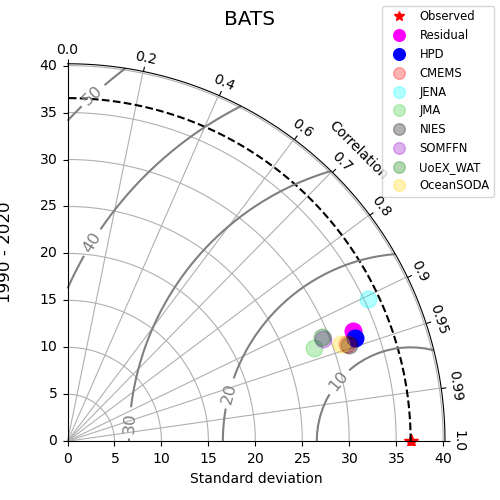

In [12]:
image1 = Image.open('/home/jovyan/test.png')
image1

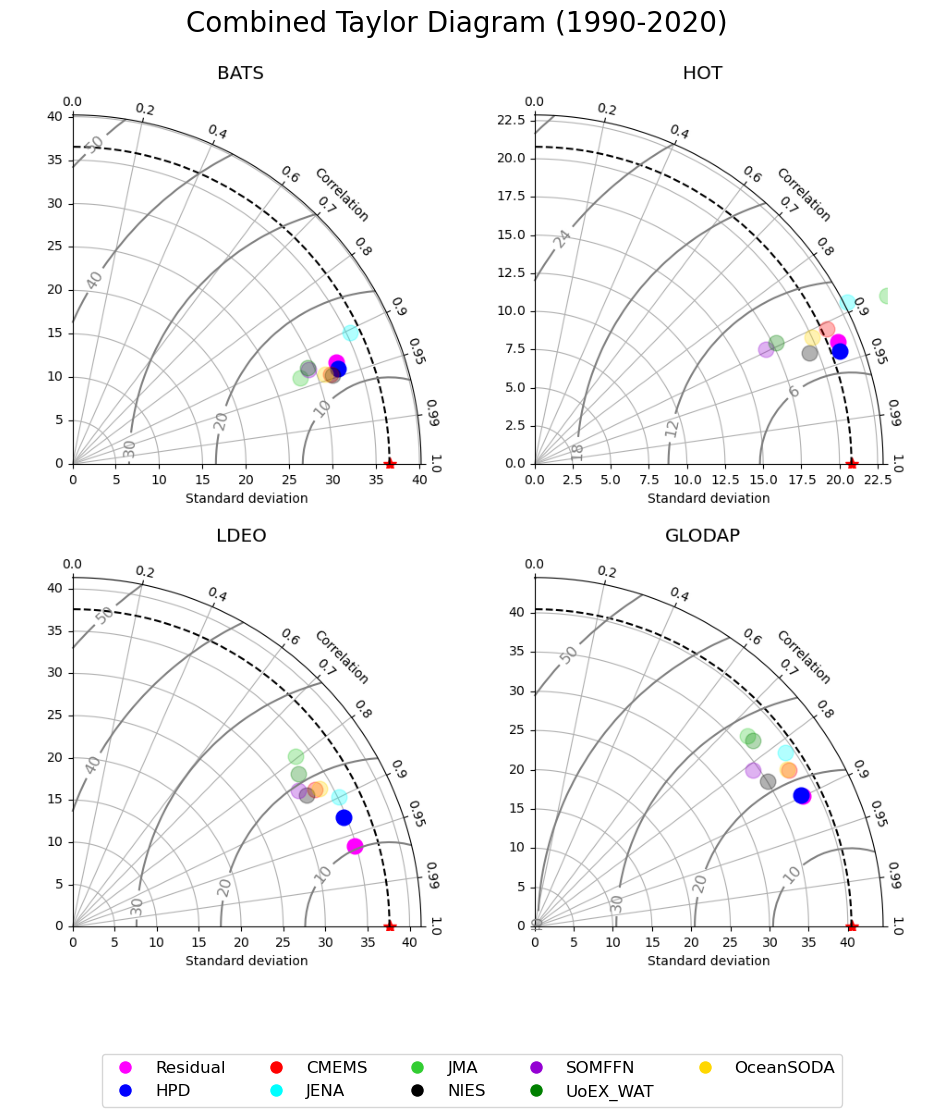

In [13]:
image2 = Image.open('/home/jovyan/Full_Taylor_Combined(1990-2020).png')
image2